In [17]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
datos = pd.read_csv('diabetes.csv')
features = datos.drop("Diabetic", axis="columns")
target = datos['Diabetic']
# Split data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

Text(0, 0.5, 'Precisión')

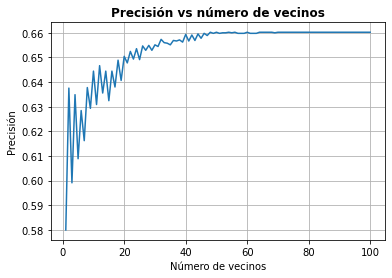

In [23]:
# Exploremos la precisión del método dependiendo del número de vecinos y métrica L_2
N = list(range(1,101))
A = []
for i in N:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_p = model.predict(x_test)
    A.append(accuracy_score(y_test, y_p))

plt.figure()
plt.plot(N, A)
plt.grid()
plt.title('Precisión vs número de vecinos', fontweight="bold")
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión')


La precisión del modelo es: 0.6593333333333333


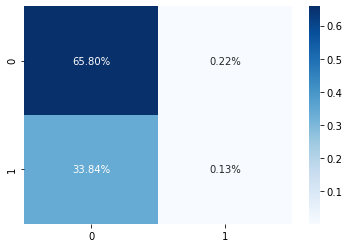

In [20]:
# Entrenamos el mejor modelo 
model = KNeighborsClassifier(n_neighbors= 40)
model.fit(x_train, y_train)
y_p = model.predict(x_test)
print('La precisión del modelo es: {}'.format(accuracy_score(y_test, y_p)))
sns.heatmap(confusion_matrix(y_test, y_p)/np.sum(confusion_matrix(y_test, y_p)), annot=True, fmt='0.2%',  cmap='Blues')